<a href="https://colab.research.google.com/github/eododukale/eododukale/blob/main/Top10WheatProductionBy_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

wheat_production_url = "https://en.wikipedia.org/wiki/List_of_countries_by_wheat_production"
population_url       = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
world_geojson_path   = "/World_Countries_(Generalized)_9029012925078512962.geojson"



In [ ]:

wheat_df = pd.read_html(wheat_production_url)[0]
population_df = population_df.rename(columns={'Location': 'Country'})
world_gdf = gpd.read_file(world_geojson_path).rename(columns={'COUNTRY': 'Country'})
print("Columns in wheat production data:")
print(wheat_df.columns)

print("\nColumns in population data:")
print(population_df.columns)

print("\nColumns in world geographical data:")
print(world_gdf.columns)

Columns in wheat production data:
Index(['Country', '2022[1]', '2021[1]', '2020[1]', '2019[1]', '2018[1]',
       '2017[1]', '2016[1]', '2015[1]', '2014[1]', '2013[1]', '2012[1]',
       '2011[1]', '2010[1]', '2009[1]', '2008[1]', '2007[1]', '2006[1]',
       '2005[1]', '2004[1]', '2003[1]', '2002[1]', '2001[1]', '2000[1]',
       '1999[1]', '1998[1]', '1997[1]', '1996[1]'],
      dtype='object')

Columns in population data:
Index(['Country', 'Population', '% of world'], dtype='object')

Columns in world geographical data:
Index(['FID', 'Country', 'ISO', 'COUNTRYAFF', 'AFF_ISO', 'geometry'], dtype='object')


In [ ]:
# For wheat_df, we'll keep 'Country' 2020, 2021, 2022'
wheat_df = wheat_df [["Country", '2022[1]',  '2021[1]',  '2020[1]']]

# For population_df, we'll drop any columns we don't need
population_df = population_df.drop(['Unnamed: 0', 'Date', 'Source (official or from the United Nations)','Notes'], axis=1, errors='ignore')

# For world_gdf, we keep only neccesary columns
columns_to_keep = ['Country', 'geometry']  # Add any other columns if need be
world_gdf = world_gdf[columns_to_keep]

In [ ]:
print("Top 10 rows of wheat production data:")
print(wheat_df.head(10))

Top 10 rows of wheat production data:
         Country  2022[1]  2021[1]  2020[1]
0    World total    808.4    772.8    757.0
1          China    137.7    136.9    134.3
2          India    107.7    109.6    107.9
3         Russia    104.2     76.1     85.9
4  United States     44.9     44.8     49.8
5      Australia     36.2     31.9     14.5
6         France     34.6     36.6     30.2
7         Canada     34.3     22.4     35.4
8       Pakistan     26.2     27.5     25.2
9        Germany     22.6     21.5     22.2


In [ ]:
print("\nTop 10 rows of population data:")
print(population_df.head(10))


Top 10 rows of population data:
         Country  Population % of world
0          World  8119000000       100%
1          China  1409670000      17.3%
2          India  1404910000      17.3%
3  United States   335893238       4.1%
4      Indonesia   281603800       3.5%
5       Pakistan   241499431       3.0%
6        Nigeria   223800000       2.8%
7         Brazil   203080756       2.5%
8     Bangladesh   169828911       2.1%
9         Russia   146150789       1.8%


In [ ]:
print("\nTop 10 rows of world geographical data:")
print(world_gdf.head(10))


Top 10 rows of world geographical data:
               Country                                           geometry
0          Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...
1              Albania  POLYGON ((19.57083 41.68527, 19.58195 41.69569...
2              Algeria  POLYGON ((4.60335 36.88791, 4.63555 36.88638, ...
3       American Samoa  POLYGON ((-170.7439 -14.37555, -170.74942 -14....
4              Andorra  POLYGON ((1.44584 42.60194, 1.48653 42.65042, ...
5               Angola  MULTIPOLYGON (((23.47611 -17.62584, 23.28916 -...
6             Anguilla  POLYGON ((-63.16778 18.16445, -63.15695 18.177...
7           Antarctica  MULTIPOLYGON (((-179.99999 -84.30535, -179.931...
8  Antigua and Barbuda  MULTIPOLYGON (((-61.73806 16.98972, -61.82917 ...
9            Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...


In [ ]:
# Avg production wheat_df
wheat_df['Average Production (2020-2022)'] = wheat_df[['2022[1]', '2021[1]', '2020[1]']].mean(axis=1)
# Remove 'World total' row
wheat_df = wheat_df[wheat_df['Country'] != 'World total']

print("\nTop 10 rows of wheat production data with average production:")
print(wheat_df.head(10))


Top 10 rows of wheat production data with average production:
          Country  2022[1]  2021[1]  2020[1]  Average Production (2020-2022)
1           China    137.7    136.9    134.3                      136.300000
2           India    107.7    109.6    107.9                      108.400000
3          Russia    104.2     76.1     85.9                       88.733333
4   United States     44.9     44.8     49.8                       46.500000
5       Australia     36.2     31.9     14.5                       27.533333
6          France     34.6     36.6     30.2                       33.800000
7          Canada     34.3     22.4     35.4                       30.700000
8        Pakistan     26.2     27.5     25.2                       26.300000
9         Germany     22.6     21.5     22.2                       22.100000
10      Argentina     22.2     17.6     19.8                       19.866667


In [ ]:
merged_df = pd.merge(wheat_df, population_df, on='Country', how='inner')
merged_df['Wheat per Million'] = merged_df['2022[1]'] / (merged_df['Population'] / 1e6)
print("\nTop 10 rows of merged data:")
print(merged_df.head(10))


Top 10 rows of merged data:
         Country  2022[1]  2021[1]  2020[1]  Average Production (2020-2022)  \
0          China    137.7    136.9    134.3                      136.300000   
1          India    107.7    109.6    107.9                      108.400000   
2         Russia    104.2     76.1     85.9                       88.733333   
3  United States     44.9     44.8     49.8                       46.500000   
4      Australia     36.2     31.9     14.5                       27.533333   
5         France     34.6     36.6     30.2                       33.800000   
6         Canada     34.3     22.4     35.4                       30.700000   
7       Pakistan     26.2     27.5     25.2                       26.300000   
8        Germany     22.6     21.5     22.2                       22.100000   
9      Argentina     22.2     17.6     19.8                       19.866667   

   Population % of world  Wheat per Million  
0  1409670000      17.3%           0.097682  
1  140491

In [ ]:
# Merge with world geometry
final_gdf = world_gdf.merge(merged_df, on='Country', how='left')

In [ ]:
# Function to create and save plots
def create_plot(gdf, column, title, filename):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf.plot(column=column, ax=ax, legend=True, cmap='YlOrRd', missing_kwds={'color': 'lightgrey'})
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

In [ ]:
# Create plots
create_plot(final_gdf, 'Average Production (2020-2022)',
            'Average Wheat Production by Country (2020-2022)', 'wheat_production.png')

create_plot(final_gdf, 'Population',
            'World Population by Country', 'world_population.png')

create_plot(final_gdf, 'Wheat per Million',
            '2022 Wheat Production per 1 Million People by Country', 'wheat_per_million.png')



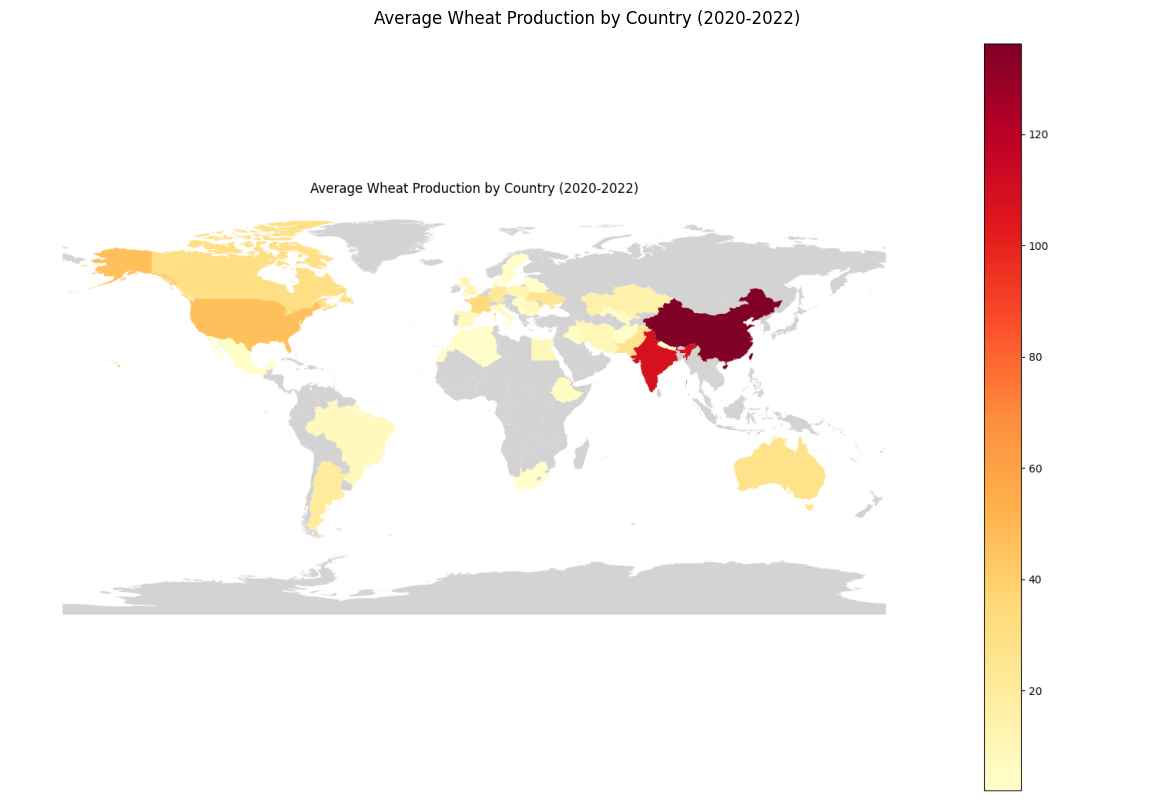

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the images
plt.figure(figsize=(15, 10))
img = mpimg.imread('wheat_production.png')
plt.imshow(img)
plt.axis('off')
plt.title('Average Wheat Production by Country (2020-2022)')
plt.show()



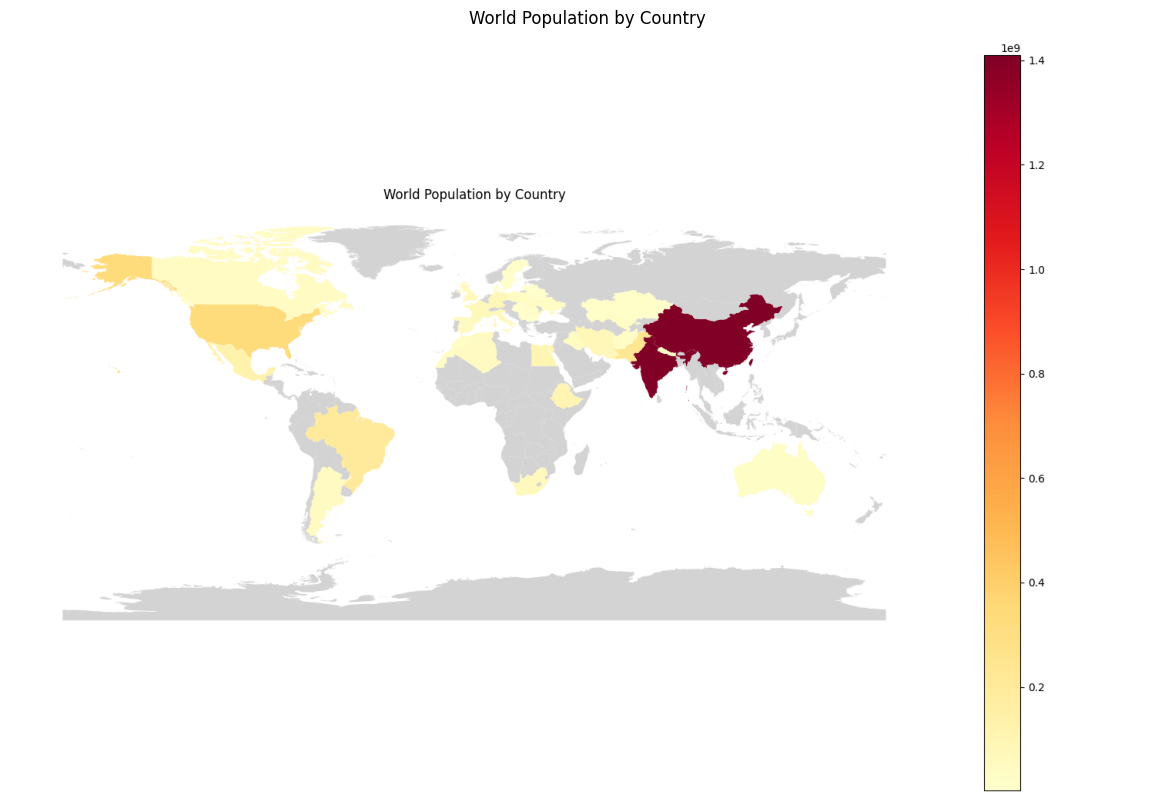

In [ ]:
# Load and display the images
plt.figure(figsize=(15, 10))
img = mpimg.imread('world_population.png')
plt.imshow(img)
plt.axis('off')
plt.title('World Population by Country')
plt.show()


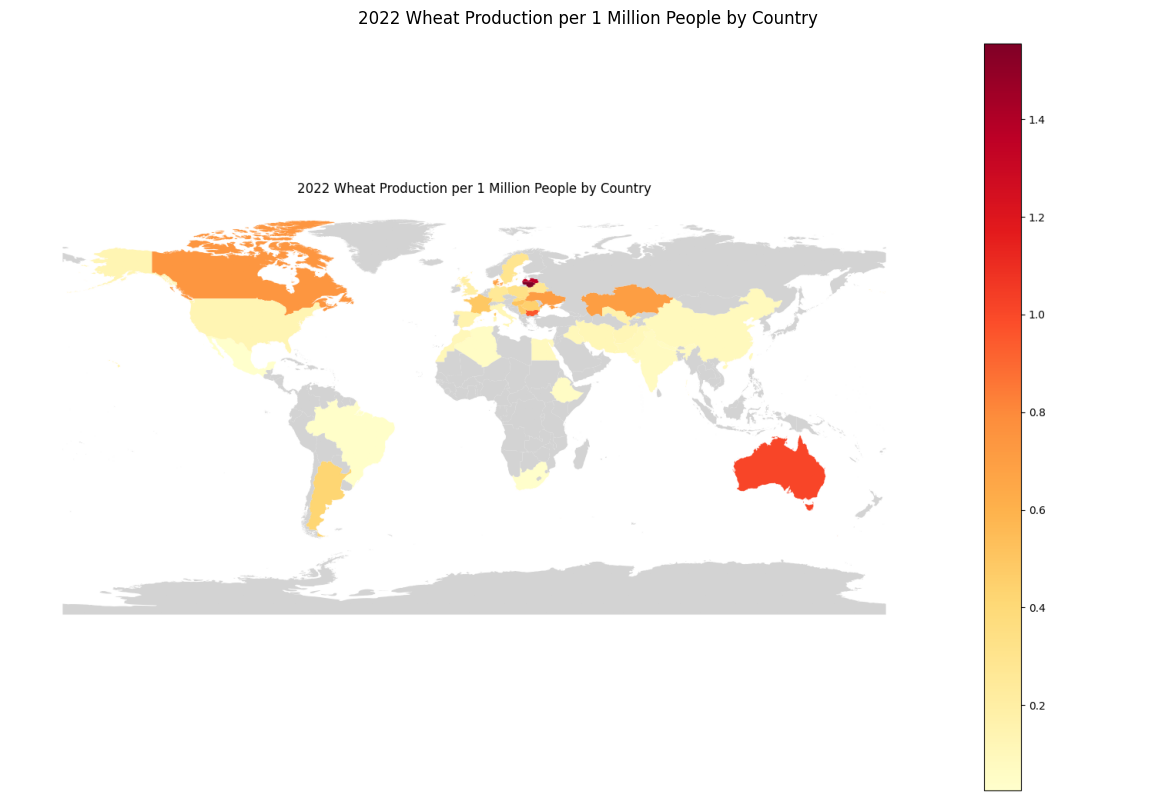

In [ ]:
# Load and display the images
plt.figure(figsize=(15, 10))
img = mpimg.imread('wheat_per_million.png')
plt.imshow(img)
plt.axis('off')
plt.title('2022 Wheat Production per 1 Million People by Country')
plt.show()
